In [ ]:
import numpy as np 

from PIL import Image 

import requests
from io import BytesIO 


#si l'arxiu de la imatge es troba a la mateixa carpeta que el *.ipynb , no cal escriure tot el path
img = Image.open("/Users/paumn/Box Sync/LA SALLE/2022-2023/MATEMÀTICA APLICADA 1BAT/2. IMATGE DIGITAL/PYTHON/alanturing.png")

def Pinta_Cercle(f, c, radi, A):

    w=A.shape[1]
    H=A.shape[0]
    
    for row in range(f-radi-1, f+radi+1): 
        for  column in range(c-radi-1, c+radi+1):    
            d=int(((row-f)**2+(column-c)**2)**(1/2))
            
            if d < radi:
                A[row,column,0]=255
                A[row,column,1]=0
                A[row,column,2]=0

img = img.convert("RGB")
A_aux = np.array(img)
A = np.array(img)     # array que contindrà la info numèrica de la imatge


s="no"
color = [0,0,0]
while s!="s":
    
    x=int(input("x=?"))
    y=int(input("y=?"))
    
    Pinta_Cercle(y,x,6,A_aux)
    display(Image.fromarray(A_aux))
    n=0
    R=0
    G=0
    B=0
    s=input("Vols aquest punt?")
    
    #L'alumnat, dilluns, haurà de tenir programat fins aquí, un bucle per escollir un "color" (pixel) de la imatge per filtrar-lo, 
    # el programa va mostrant la imatge i un punt vermell en les coordenades seleccionades per verificar si és el punt volgut.
    
    
    if s=="s":
                
        for i in range(y-3,y+3+1):
            for j in range(x-3,x+3+1):
                
                n+=1
                R = R+int(A[i,j,0])
                G = G+int(A[i,j,1])
                B = B+int(A[i,j,2])
        
        color[0] = R/n  
        color[1] = G/n    
        color[2] = B/n 
        
        # Amb els 2 for's anteriors i la divisió entre n, calculen la mitjana de color dels 3 canals dels pixels del voltant
        
    else:
        A_aux = np.array(img)
        print("Torna a escollir coordenades")

for row in range(img.height): 
    for  col in range(img.width): 
        dist_color = int(((A[row,col,0]-int(color[0]))**2+(A[row,col,1]-int(color[1]))**2+(A[row,col,2]-int(color[2]))**2)**(1/2))
        if dist_color>70:
            A[row,col,0]=255
            A[row,col,1]=255
            A[row,col,2]=255

Image.fromarray(A)


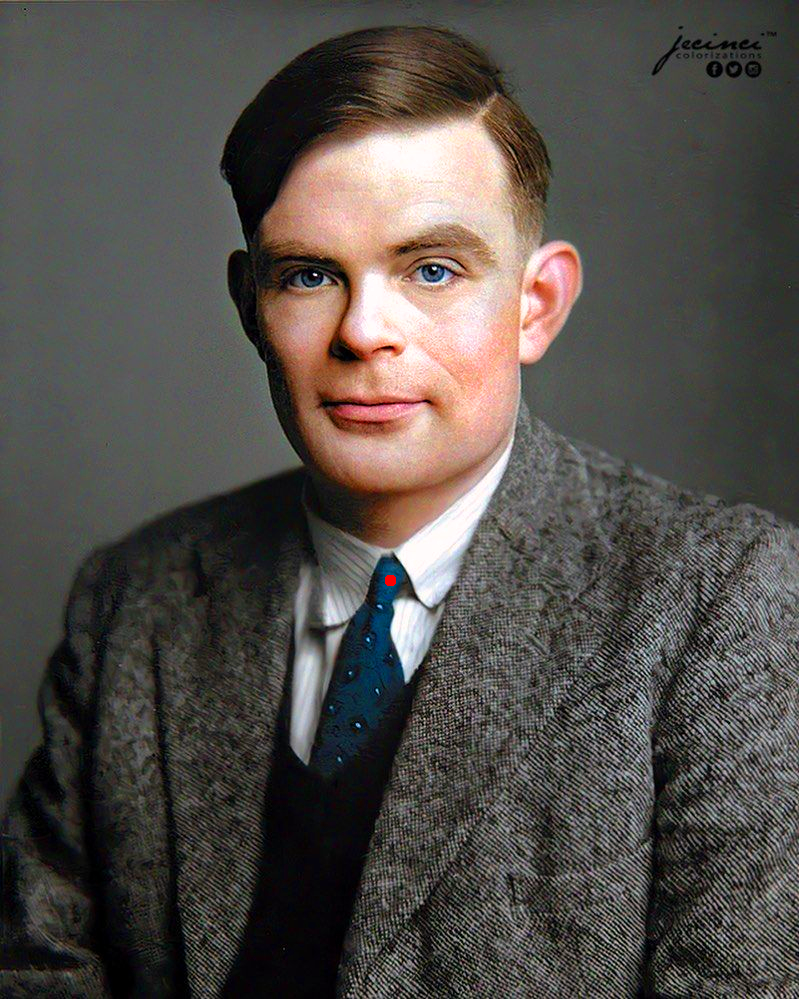

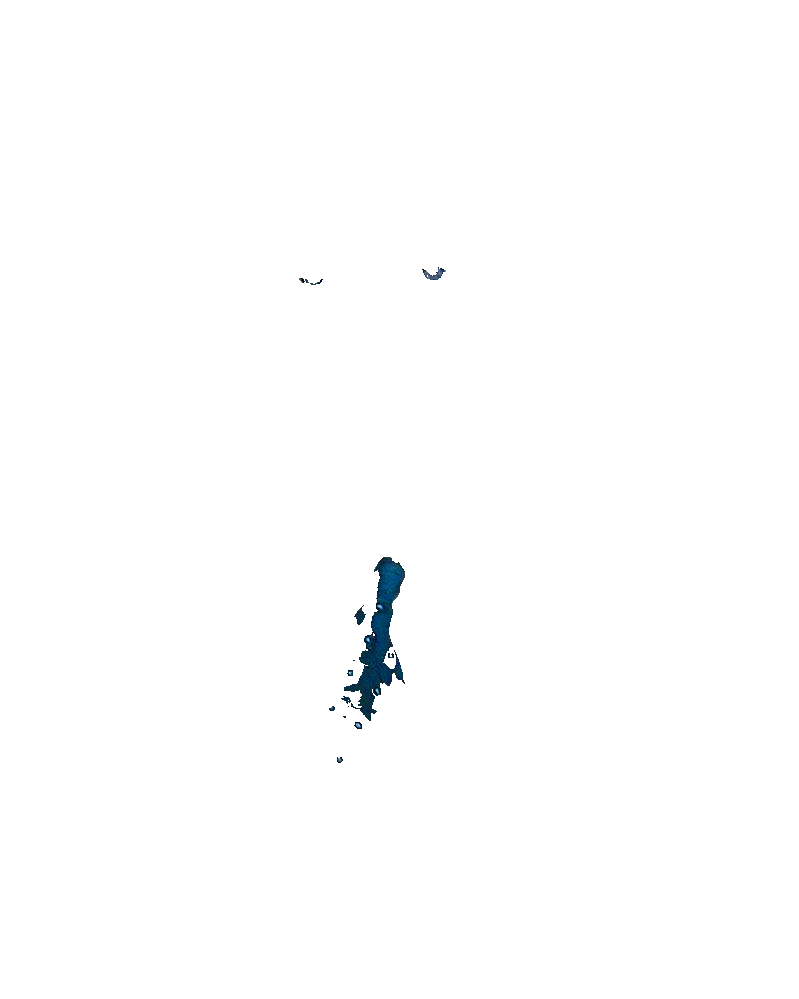

In [5]:
from PIL import ImageFilter
#img = img.convert("HSV")
img = img.convert("RGB")
img_BLUR = img.filter((ImageFilter.BLUR)) #Per reduir el soroll de la imatge filtrada, suavitzem la imatge i després filtrem el color desitjat
A_aux = np.array(img)
A = np.array(img)
A_blur = np.array(img_BLUR)

color = [0,0,0]
s="no"
color = [0,0,0]
while s!="s":
    
    x=int(input("x=?"))
    y=int(input("y=?"))
    
    Pinta_Cercle(y,x,6,A_aux)
    display(Image.fromarray(A_aux))
    n=0
    R=0
    G=0
    B=0
    s=input("Vols aquest punt?")
    
    #L'alumnat, dilluns, haurà de tenir programat fins aquí, un bucle per escollir un "color" (pixel) de la imatge per filtrar-lo
    
    if s=="s":
                
        for i in range(y-3,y+3+1):
            for j in range(x-3,x+3+1):
                
                n+=1
                R = R+int(A_blur[i,j,0])
                G = G+int(A_blur[i,j,1])
                B = B+int(A_blur[i,j,2])
        
        color[0] = R/n  
        color[1] = G/n    
        color[2] = B/n 
        
        # Amb els 2 for's anteriors i la divisió entre n, calculen la mitjana de color dels 3 canals dels pixels del voltant
        
    else:
        A_aux = np.array(img)
        print("Torna a escollir coordenades")

for row in range(img.height): 
    for  col in range(img.width): 
        dist_color = int(((A_blur[row,col,0]-int(color[0]))**2+(A_blur[row,col,1]-int(color[1]))**2+(A_blur[row,col,2]-int(color[2]))**2)**(1/2))
        if dist_color>70:
            A[row,col,0]=255
            A[row,col,1]=255
            A[row,col,2]=255

Image.fromarray(A)

